# Forest Fire Prediction

### Data Description and Cleaning

Import Libraries

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Import Dataset

In [208]:
df = pd.read_csv('ForestFire.csv')
df['Fire Occurrence'] = df['Fire Occurrence'].replace([0,1],['Safe','Fire'])

DataFrame Shape

In [209]:
df.shape

(39, 5)

Sample

In [210]:
df.sample(5)

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
18,Amsterdam,28,43,15,Fire
2,Ecuador,10,20,70,Safe
13,Bangalore,20,23,23,Safe
9,Rabat,30,50,45,Fire
14,Ecuador,60,34,15,Fire


Description

In [211]:
df.describe()

,Oxygen,Temperature,Humidity
count,39.000000,39.000000,39.000000
mean,33.846154,33.794872,36.282051
std,23.734872,16.225677,28.046905
min,0.000000,0.000000,0.000000
25%,11.500000,20.000000,13.500000
50%,30.000000,35.000000,30.000000
75%,50.000000,45.000000,62.500000
max,89.000000,60.000000,100.000000


NaN Value Count

In [212]:
df.isnull().sum()

Area               0
Oxygen             0
Temperature        0
Humidity           0
Fire Occurrence    0
dtype: int64

###### Hence no missing value analysis required

DataFrame Split

In [213]:
X = df
Y = df['Fire Occurrence']
X.drop(['Area','Fire Occurrence'],inplace=True,axis=1)

### Train-Test Split

In [214]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

### Exploratory Analysis

Correlation Analysis

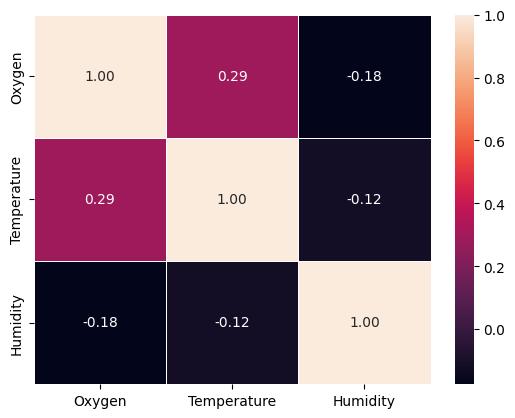

In [215]:
sb.heatmap(X.corr(method='pearson'), xticklabels=X.corr().columns, yticklabels=X.corr().columns,annot=True,fmt=".2f",linewidth=.5)
plt.show()

### Model Building

In [216]:
em = pd.DataFrame(columns = ['Model Name','Accuracy','Precision','Recall','F1 Score'])

#### K-Neighbors Classifier

In [217]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

best_model = (None,0)
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,Y_train.ravel())
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")
if accuracy_score(Y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))

em.loc[len(em)] = ['KNN',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

Predicted Accuracy: 75.0%


Prediction

In [218]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Confusion Matrix

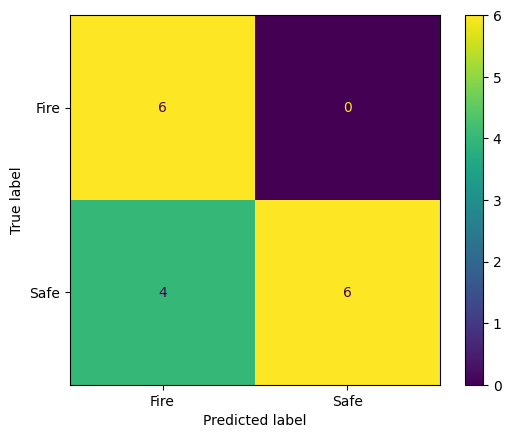

In [219]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Logistic Regression

In [220]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")
if accuracy_score(Y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))
em.loc[len(em)] = ['Logistic Regression',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

Predicted Accuracy: 100.0%


Predict

In [221]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Confusion Matrix

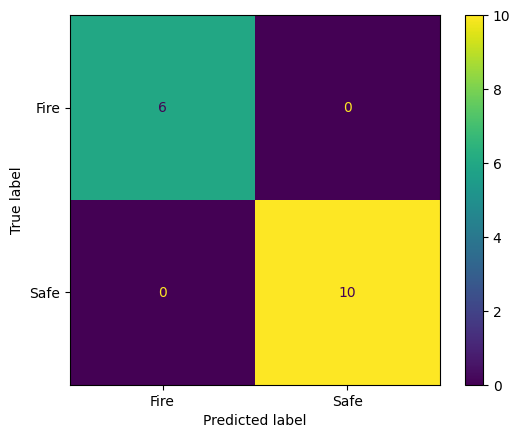

In [222]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Decision Tree Classifier

In [223]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")
if accuracy_score(Y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))
em.loc[len(em)] = ['Decision Tree',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

Predicted Accuracy: 81.2%


Predict

In [224]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Decision Tree Plot

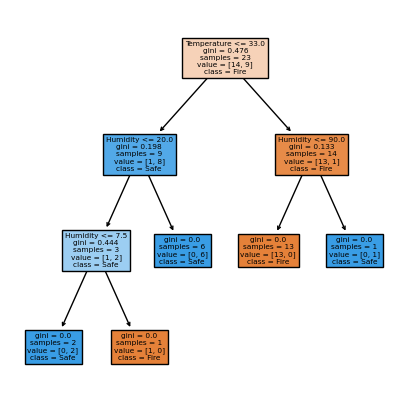

In [225]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5,5))
plot_tree(model,feature_names=X.columns,class_names=model.classes_,filled=True)
plt.show()

Confusion Matrix

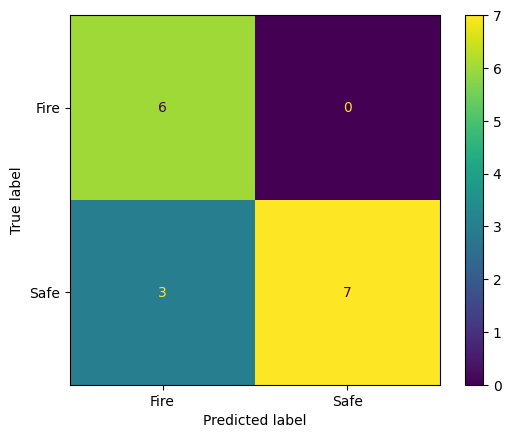

In [226]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

#### Random Forest Classifier

In [227]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,Y_train.ravel())
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(Y_test, Y_predict).round(3)*100}%")
if accuracy_score(Y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))
em.loc[len(em)] = ['Random Forest',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

Predicted Accuracy: 100.0%


Predict

In [228]:
import numpy as np
arr = np.array([[25,56,79]])
print(model.predict(arr))

['Fire']


Confusion Matrix

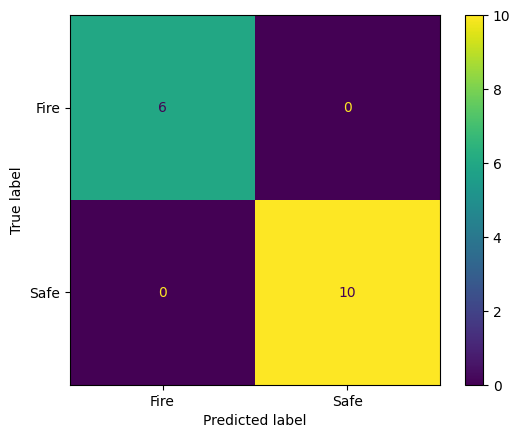

In [229]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_predict,labels=model.classes_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)
cm_display.plot()
plt.show()

### Naive Bayes Classifier

Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train = Y_train.replace(['Safe','Fire'],[0,1])
y_test = Y_test.replace(['Safe','Fire'],[0,1])
model = MultinomialNB()
model.fit(X_train,y_train)
Y_predict = model.predict(X_test)
print(f"Predicted Accuracy: {accuracy_score(y_test, Y_predict).round(3)*100}%")
if accuracy_score(y_test, Y_predict) > best_model[1]:
    best_model = (model,accuracy_score(Y_test, Y_predict))
Y_predict = pd.DataFrame(Y_predict).replace
# em.loc[len(em)] = ['XGBoost',accuracy_score(Y_test, Y_predict),precision_score(Y_test,Y_predict,average='weighted'),recall_score(Y_test,Y_predict,average='weighted'),f1_score(Y_test,Y_predict,average='weighted')]

Predicted Accuracy: 68.8%


AttributeError: 'numpy.ndarray' object has no attribute 'replace'

#### Model Comparision

In [231]:
em.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)

,Model Name,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,1.0000,1.000000,1.0000,1.000000
1,Random Forest,1.0000,1.000000,1.0000,1.000000
2,XGBoost,0.9375,0.946429,0.9375,0.938259
3,Decision Tree,0.8125,0.875000,0.8125,0.814706
4,KNN,0.7500,0.850000,0.7500,0.750000


### Pickling

In [232]:
import pickle

print("Best Model: ",best_model[0], "\nBest Accuracy: ",best_model[1])

with open('fire/model','wb') as f:
    pickle.dump(best_model[0],f)

Best Model:  LogisticRegression() 
Best Accuracy:  1.0
